In [1]:
#importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
# creating path to data
train_path = 'Tomatoes/train'
valid_path = 'Tomatoes/val'

In [3]:
IMG_SHAPE = 224
batch_size = 100

In [4]:
#using ImageDataGenerator to create a transformation that rescales
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_path,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 10000 images belonging to 11 classes.


In [5]:
image_gen_val = ImageDataGenerator(rescale=1./255)

valid_data_gen = image_gen_val.flow_from_directory(
                                        batch_size=batch_size,
                                        directory=valid_path,
                                        shuffle=False,
                                        target_size=(IMG_SHAPE,IMG_SHAPE),
                                        class_mode='sparse'
                                        )

Found 1000 images belonging to 11 classes.


In [6]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

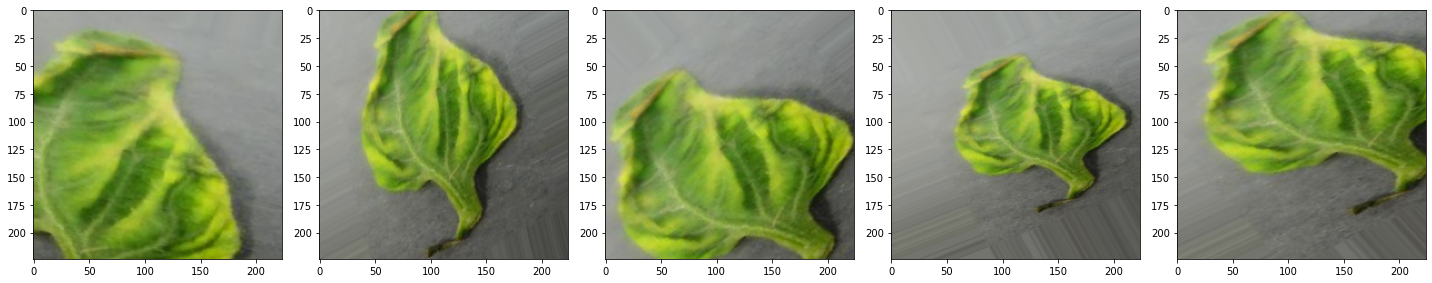

In [7]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [8]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    
    Flatten(),
    Dropout(0.2),
    
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(11, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# model training
history = model.fit(train_data_gen,
    steps_per_epoch = int(np.ceil(train_data_gen.n / float(batch_size))),
    validation_data = valid_data_gen,
    validation_steps = int(np.ceil(valid_data_gen.n / float(batch_size))),
    epochs = 20, verbose = 2
)
print(history)

Epoch 1/20
100/100 - 113s - loss: 1.9977 - accuracy: 0.2988 - val_loss: 1.7358 - val_accuracy: 0.3900 - 113s/epoch - 1s/step
Epoch 2/20
100/100 - 104s - loss: 1.3873 - accuracy: 0.5301 - val_loss: 1.4643 - val_accuracy: 0.4850 - 104s/epoch - 1s/step
Epoch 3/20
100/100 - 105s - loss: 1.1246 - accuracy: 0.6179 - val_loss: 1.3303 - val_accuracy: 0.5440 - 105s/epoch - 1s/step
Epoch 4/20
100/100 - 105s - loss: 0.9943 - accuracy: 0.6619 - val_loss: 1.7798 - val_accuracy: 0.4620 - 105s/epoch - 1s/step
Epoch 5/20
100/100 - 104s - loss: 0.8946 - accuracy: 0.6922 - val_loss: 1.2700 - val_accuracy: 0.5900 - 104s/epoch - 1s/step
Epoch 6/20
100/100 - 105s - loss: 0.8208 - accuracy: 0.7185 - val_loss: 1.3877 - val_accuracy: 0.5630 - 105s/epoch - 1s/step
Epoch 7/20
100/100 - 104s - loss: 0.7648 - accuracy: 0.7332 - val_loss: 1.1305 - val_accuracy: 0.6330 - 104s/epoch - 1s/step
Epoch 8/20
100/100 - 104s - loss: 0.7235 - accuracy: 0.7518 - val_loss: 1.3267 - val_accuracy: 0.6020 - 104s/epoch - 1s/step


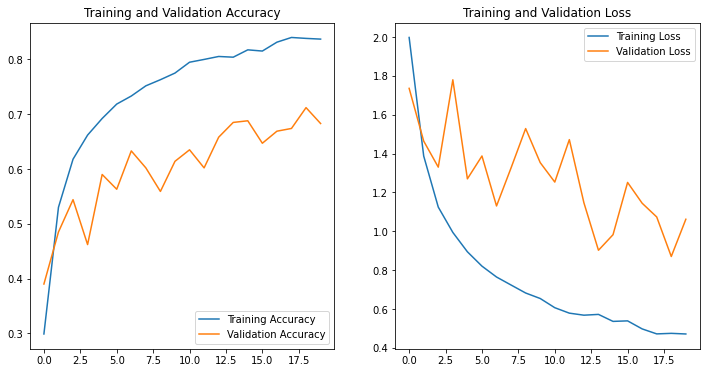

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()